 # Red Wine Quality Prediction

In [43]:
#importing libraries
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV ,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline



In [50]:
#Dataset dowloading from GitHUb 
report = ('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
Red_wine_data = pd.read_csv(report)
Red_wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:

Red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
# Data Wrangling (Handling the missing values)
Red_wine_data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

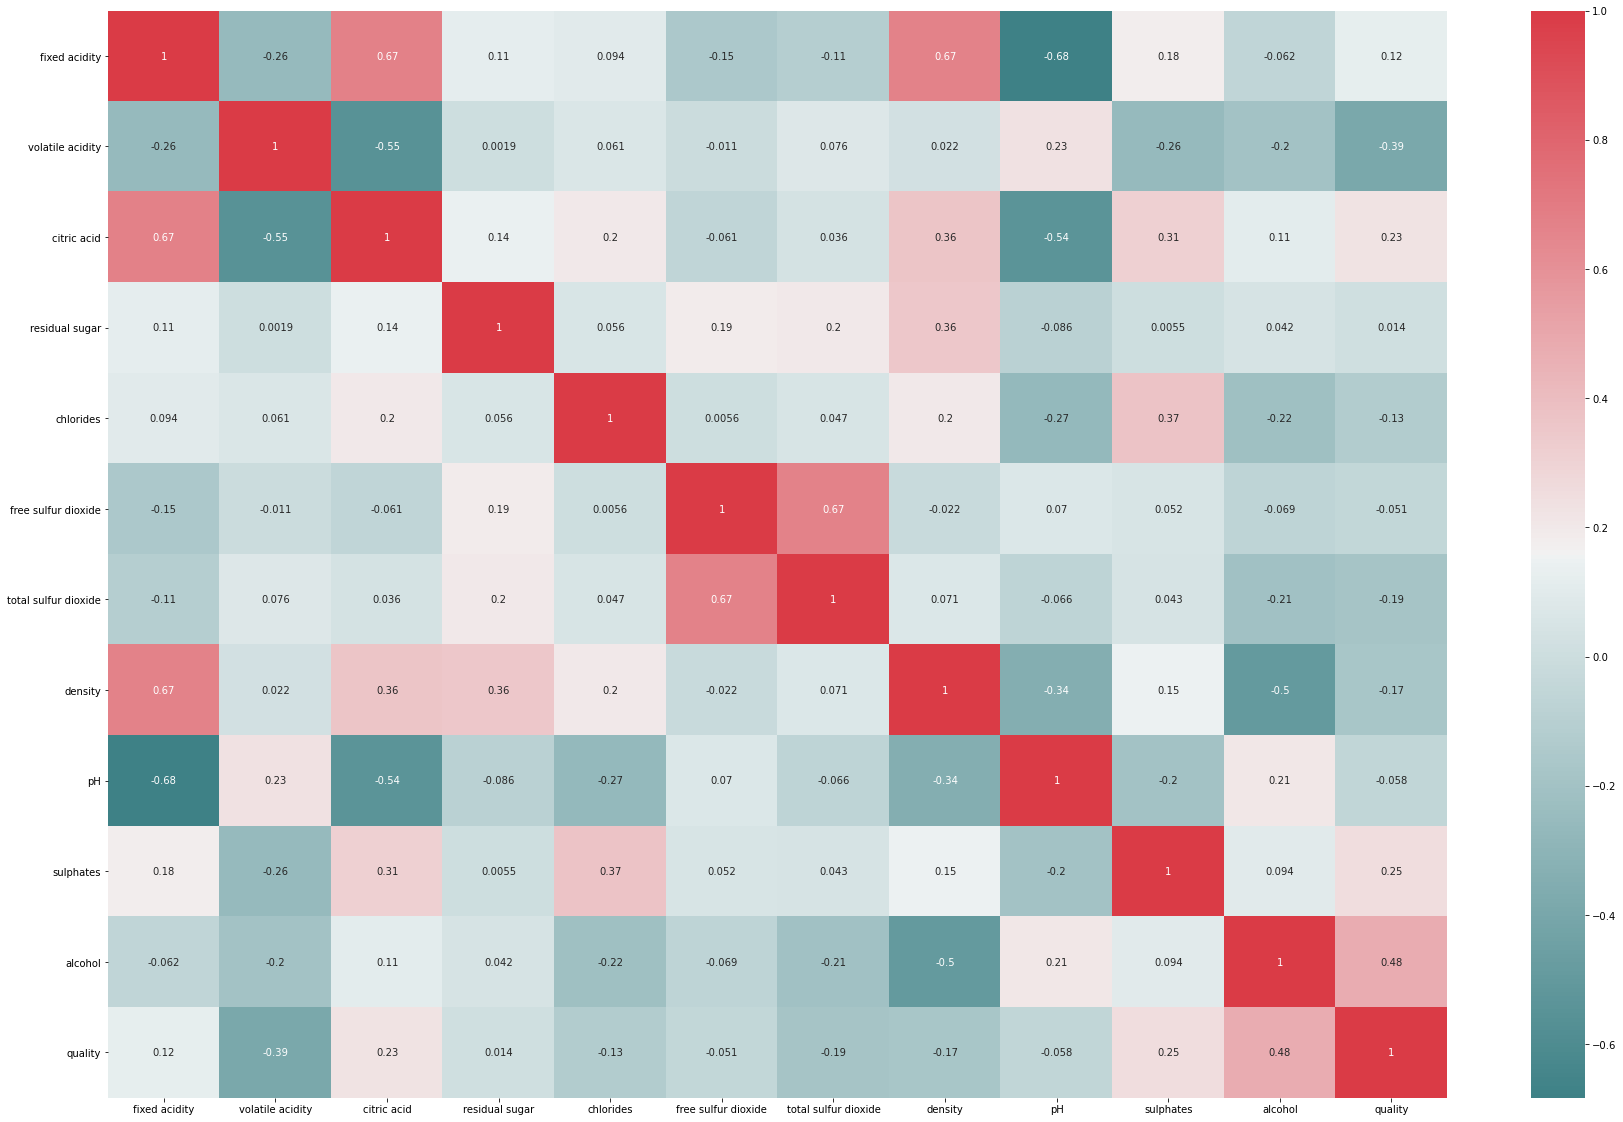

In [12]:
#Data Exploration:Since this dataset consists of 12 features of red wine, there might be strong correlations between features.
# checking the correlation between features

plt.figure(figsize=(30,20))
corr =Red_wine_data.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()


Analysis: From the above graph we can see that alcohol is most strongly correlated with quality, and the correlation is positive.(value=0.48)

No handles with labels found to put in legend.


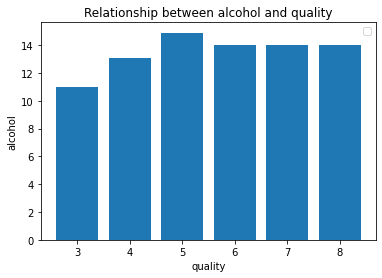

In [14]:
plt.bar(Red_wine_data['quality'], Red_wine_data['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

Analysis: As we know that wines of lower quality tend to have a lower level of alcohol. However, correlation does not indicate a causal relationship. Further Investigation is really needed 

# Data Normalization for classification model.

Normalizing the data will transform the data so that its distribution has a uniform range. It’s important to equalize the ranges of the data here because in our dataset citric acid and volatile acidity, for example, have all of their values between 0 and 1. In contrast, total sulfur dioxide has some values over 100 and some values below 10. This disparity in ranges may cause a problem since a small change in a feature might not affect the other.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_Red_wine_data = scaler.fit_transform(Red_wine_data)
normal_Red_wine_data = pd.DataFrame(normal_Red_wine_data, columns = Red_wine_data.columns)
print(normal_Red_wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [17]:
#create a new column named “good wine” in the original dataset df. 
#“Good wine” equals “yes” when the quality is equal or above 7. 
#“Good wine” equals “no” when the quality is less than 7. 
#Classification models will finally output “yes” or “no” to predict wine quality.

Red_wine_data["good wine"] = ["yes" if i >= 7 else "no" for i in Red_wine_data['quality']]

In [18]:
X = normal_Red_wine_data.drop(["quality"], axis = 1)
y = Red_wine_data["good wine"]

In [19]:
y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

Analysis: Create features X and target variable y. X is all the features from the normalized dataset except “quality”. y is the newly created “good wine” variable from the original dataset df.
Finally, I want to make sure there is enough “good wine” exists in y.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


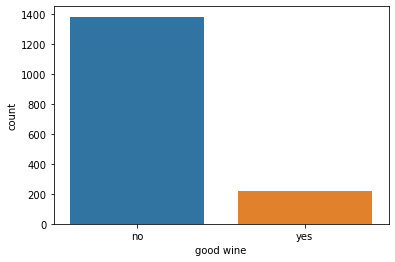

In [22]:
#Visualize the counts
sns.countplot(y)
plt.show()

Analysis:The result is a bit imbalanced but fair enough. We have over 200 good wines. 

# Checking Accuracy on Baseline Modeling:

In [24]:
#spliting dataset for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

In [26]:
# Baseline Classification

from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2020)
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8645833333333334


# Model Name 1 : Decision Tree

Decision tree is a classification model in the form of a tree structure. It builds through a process known as binary recursive. Decisoin tree splits the data into partitions, and then splits it up further on each of the branches.”

In [27]:
#fit the training data to a decision tree model.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2020)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2020)

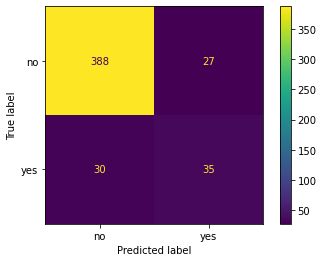

0.88125


In [28]:
#prediction from the test set

from sklearn.metrics import plot_confusion_matrix
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()
print(metrics.accuracy_score(y_test, y_pred))

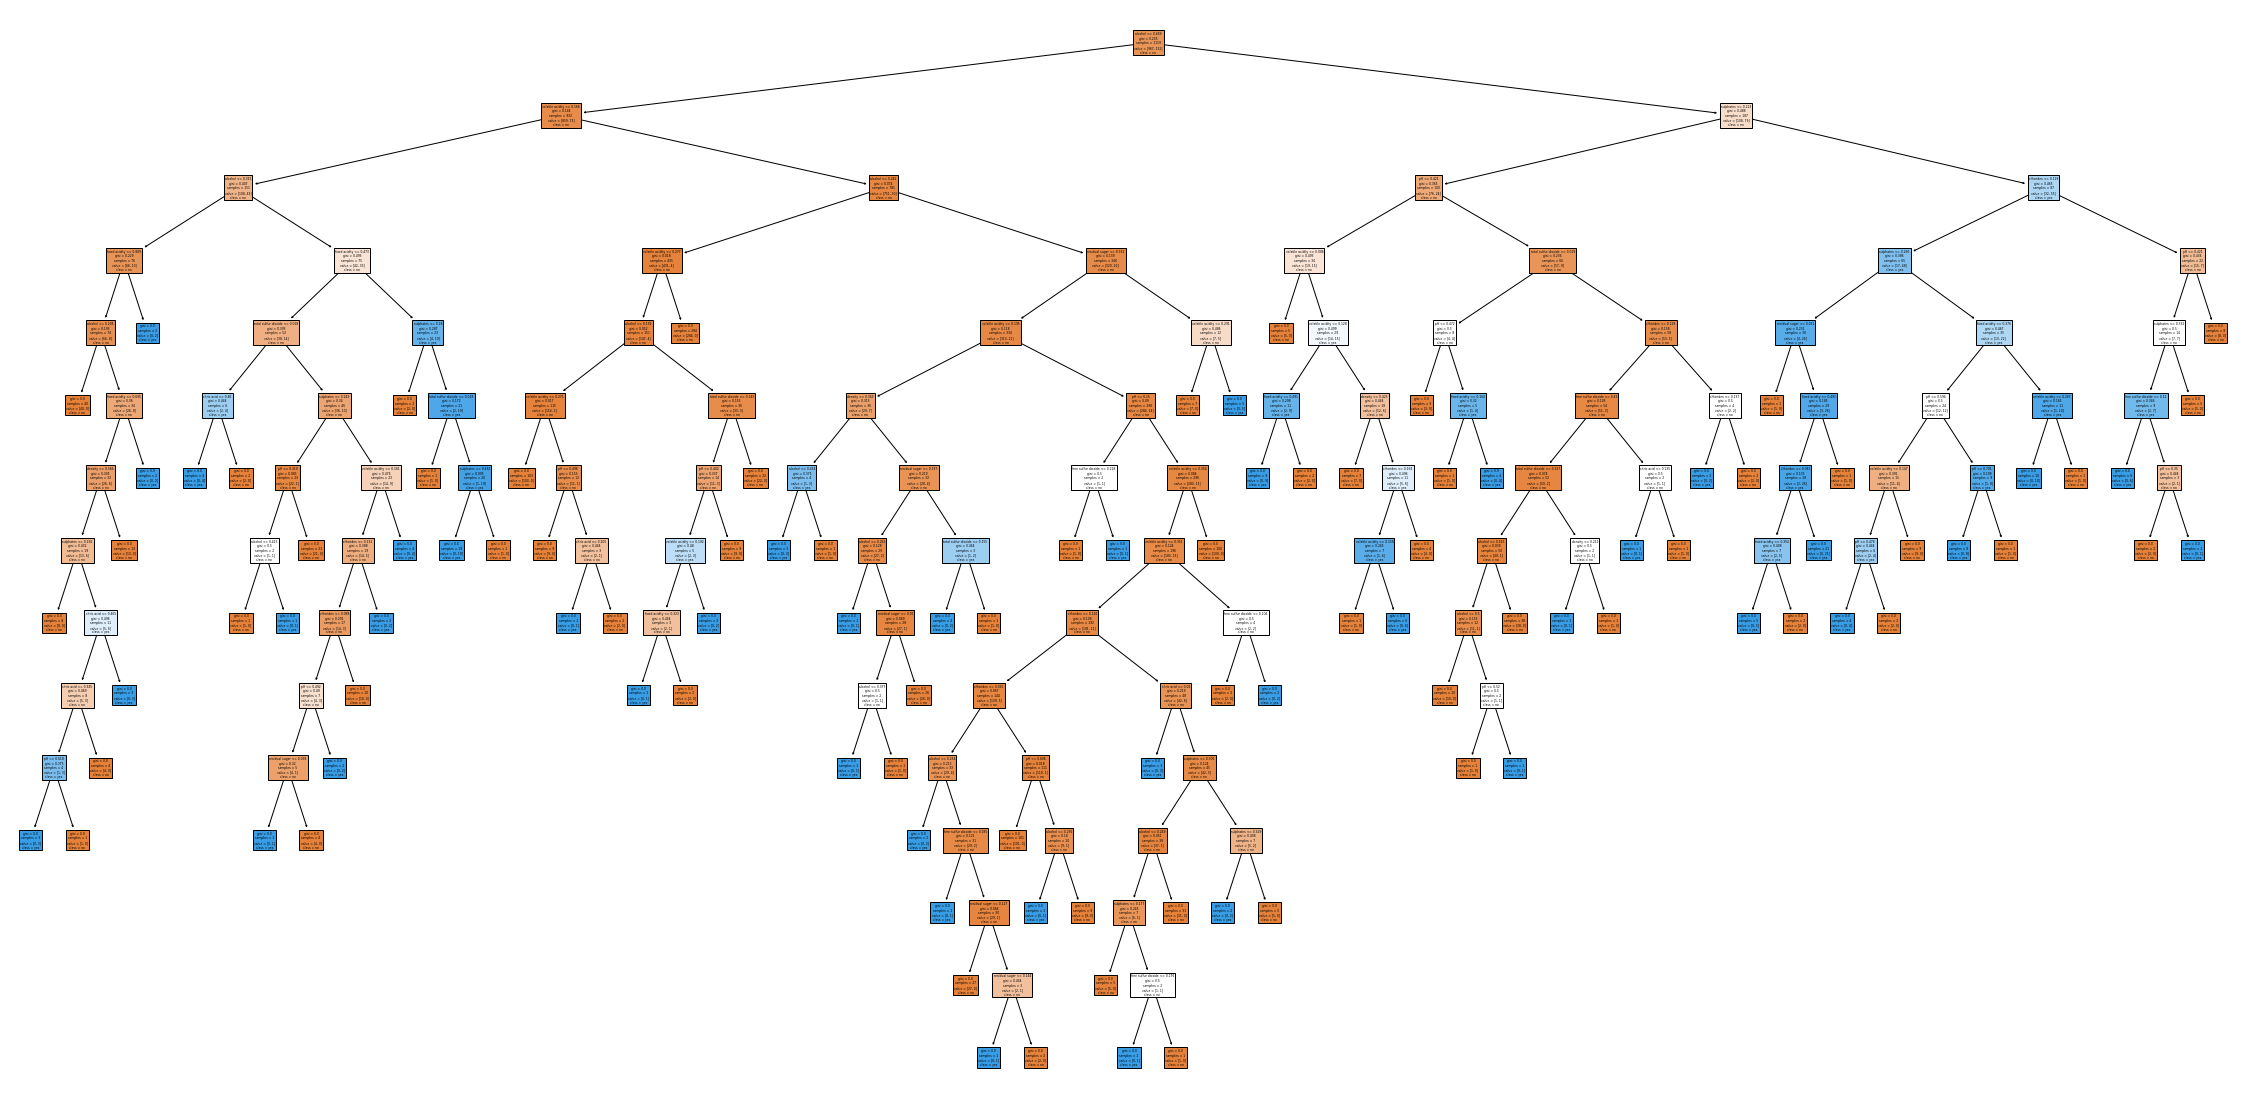

In [29]:
# checking the decision tree is overfitting

from sklearn import tree
plt.figure(figsize=(40,20))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

Analysis: From the graph, we can observe that the decision tree is overfitting since, it branches exhaustively on the training set. 

In [30]:
scores = cross_val_score(dt, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8054917711598746


In [31]:
#Accuracy score on training data
y_pred_train = dt.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [34]:
#Tune the Model’s Parameters:
param_dist = {"max_depth": range(1,6),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"]}
dt_cv = GridSearchCV(dt, param_dist, cv=5)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 8}


In [35]:
dt_new = DecisionTreeClassifier(criterion = "gini",
                                max_depth = 2,
                                max_features = 8,
                                random_state = 2020)
dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))
scores = cross_val_score(dt_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

0.8854166666666666
Cross Validation Score:  0.8786794670846394


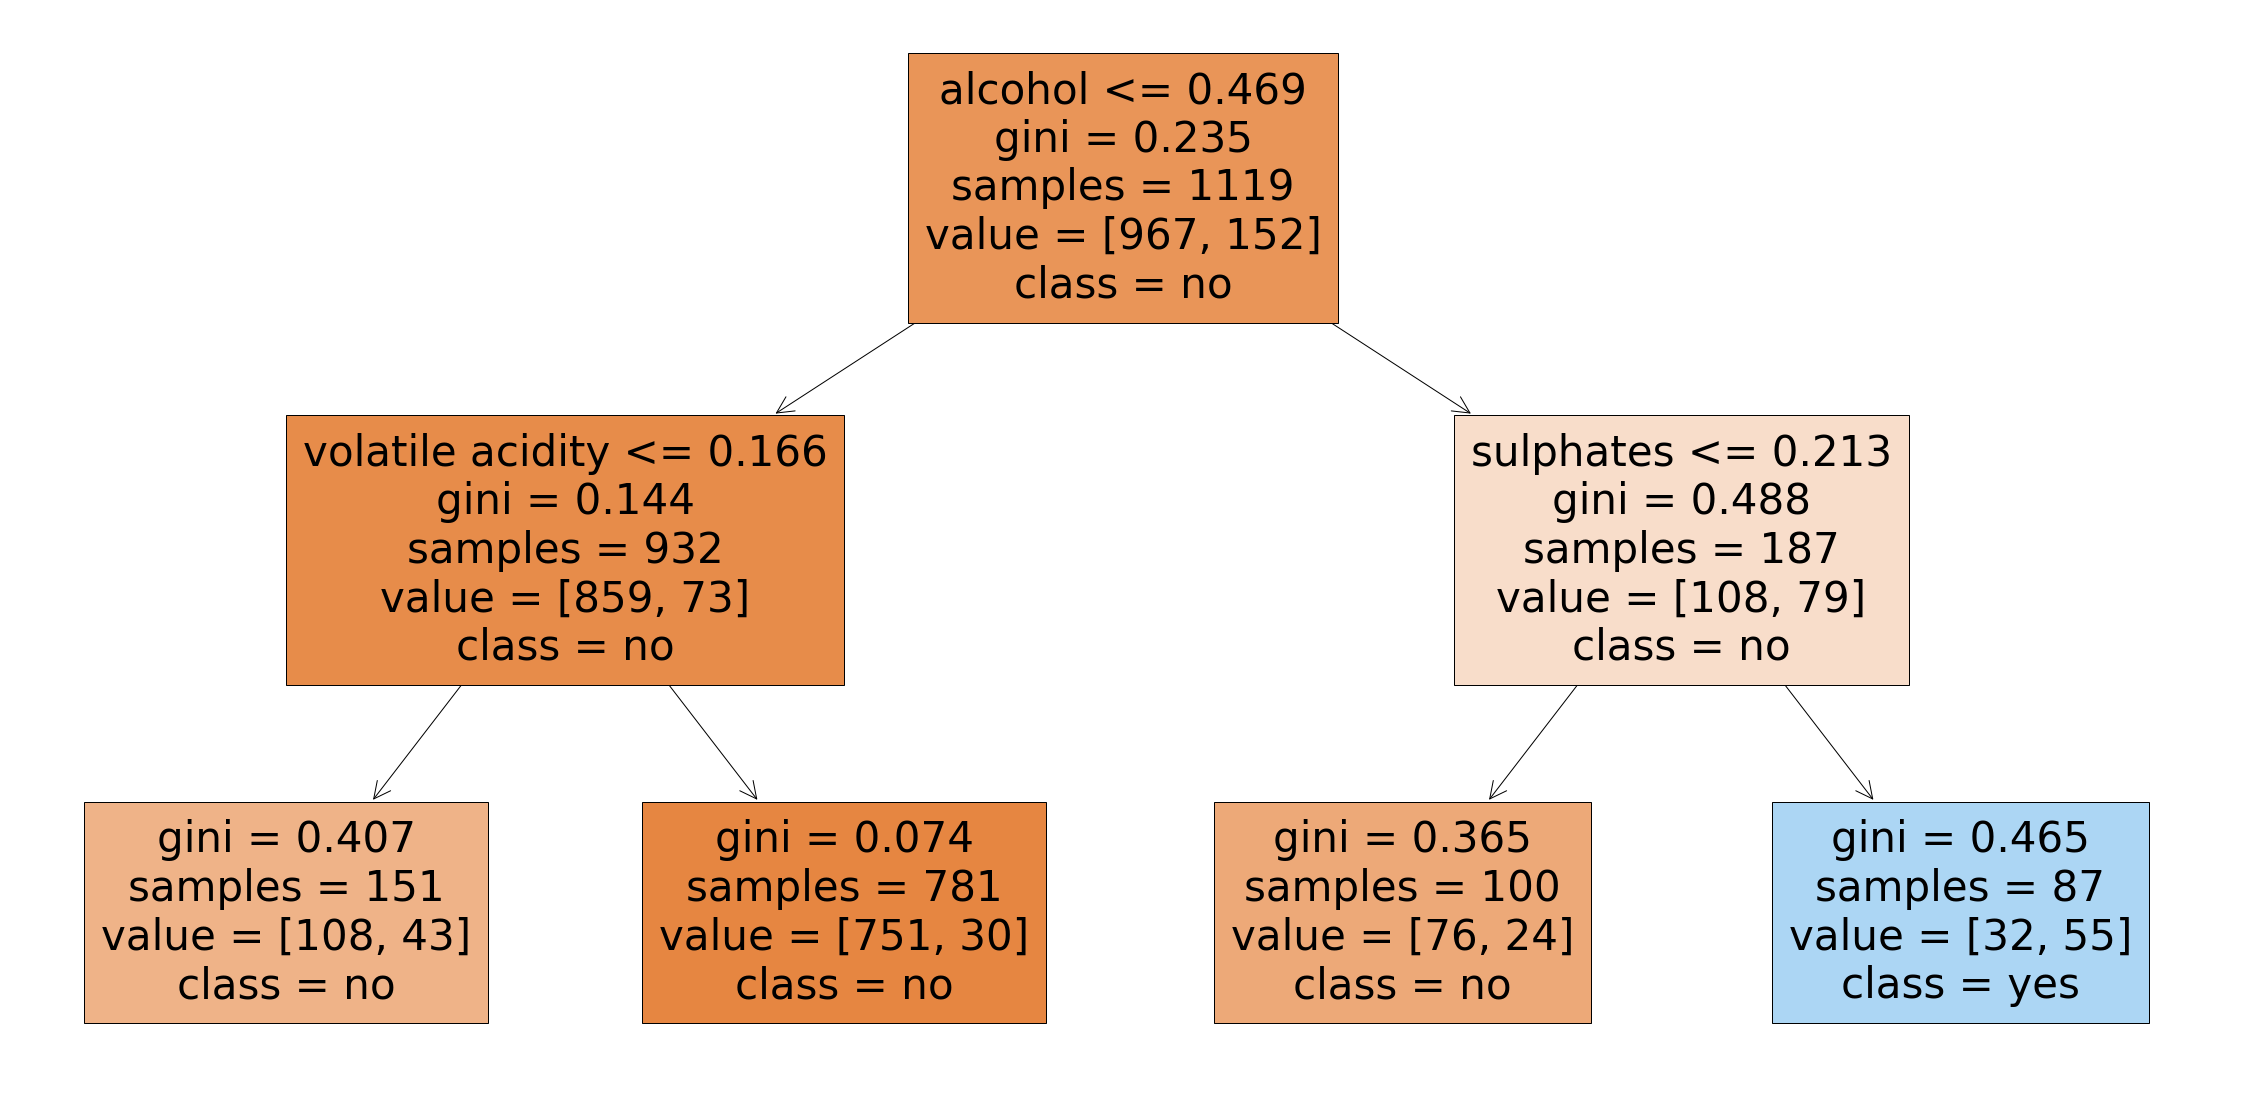

In [36]:
# Visualization of New Tree
plt.figure(figsize=(40,20))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()

# Model Name 2 : Random Forest

In [37]:
# fit the training data to a random forest model

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [38]:
#predict the outcomes for the test set and print its accuracy score.
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666


In [39]:
#Check if overfitting occurs for random forest
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8680466300940439


In [40]:
#Accuracy score on training data:
y_pred_train = rf_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0



# The final accuracy on testing dataset of the Baseline model is 0.86 (86%)
# The final accuracy on testing dataset of the decision tree model is 0.88. (88%)
# The final accuracy on testing dataset of the random forest model is 0.91 (91%)

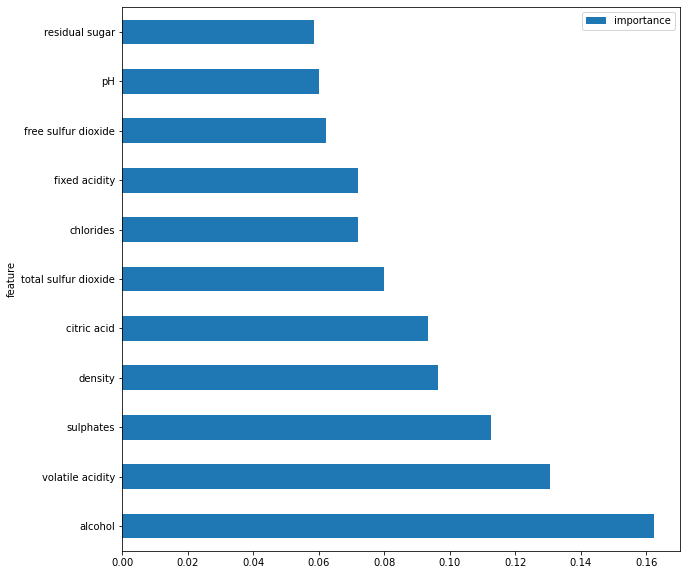

In [49]:
imp_rf.plot.barh(figsize=(10,10))
plt.show()

Analysis: The graph shows more intuitively alcohol, volatile acidity, and sulphates weigh more than others in predicting wine quality.